# ANÁLISIS DE DATOS: CLIMA DIARIO EN EEUU EN EL AÑO 2017

IDEA PRINCIPAL: **Análisis de las variaciones meteorológicas en estaciones climáticas de EE. UU. durante el 2017.**

## LIMPIEZA Y TRANSFORMACIÓN DE DATOS

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [56]:
df = pd.read_csv('weather.csv')
print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')
df.head()

Cantidad de filas: 416937
Cantidad de columnas: 15


,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,20170312,71.06,87.08,80.06,4.473880,360.0,21.027236,0.0,0.0,0.0
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170404,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.0
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170420,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.0
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170120,69.08,82.04,NaN,3.355410,360.0,17.000744,0.0,0.0,0.0
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170217,73.04,87.08,NaN,4.697574,360.0,19.908766,0.0,0.0,0.0


## LIMPIEZA DE DATOS

In [57]:
# NAs en cada columna
def show_na(df):
    for i in df.columns:
        if df[i].isna().sum() > 0:
            print('-----------------')
            print(i, df[i].isna().sum())
            #print(df[i].unique())
            
show_na(df)

-----------------
TMIN 1344
-----------------
TMAX 1273
-----------------
TAVG 157899
-----------------
AWND 182057
-----------------
WDF5 190822
-----------------
WSF5 190762
-----------------
SNOW 281828
-----------------
SNWD 104495
-----------------
PRCP 1972


In [58]:
# proporción de na en cada columna
def show_na_prop(df):
    for i in df.columns:
        if df[i].isna().sum() > 0:
            print('-----------------')
            print(i,"NAs:" , df[i].isna().sum(), "Proportion:" ,round(df[i].isna().sum()/df.shape[0] * 100,3),'%')
            #print(df[i].unique())
            
show_na_prop(df)

-----------------
TMIN NAs: 1344 Proportion: 0.322 %
-----------------
TMAX NAs: 1273 Proportion: 0.305 %
-----------------
TAVG NAs: 157899 Proportion: 37.871 %
-----------------
AWND NAs: 182057 Proportion: 43.665 %
-----------------
WDF5 NAs: 190822 Proportion: 45.768 %
-----------------
WSF5 NAs: 190762 Proportion: 45.753 %
-----------------
SNOW NAs: 281828 Proportion: 67.595 %
-----------------
SNWD NAs: 104495 Proportion: 25.063 %
-----------------
PRCP NAs: 1972 Proportion: 0.473 %


Nos regiremos de un treshold basado en que si la proporción de datos faltantes es menor al 30%, podrá apoyarse de técnicas de imputación, enriqueciendo sus datos.

In [59]:
# Delete rows with NAs proportion > 30%

def delete_na(df):
    for i in df.columns:
        if df[i].isna().sum() > 0:
            if round(df[i].isna().sum()/df.shape[0] * 100,3) > 30:
                df.dropna(subset=[i], inplace=True)
    return df

delete_na(df)

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,20170312,71.06,87.08,80.06,4.473880,360.0,21.027236,0.00000,0.000000,0.000000
7,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170207,-0.76,22.10,13.64,3.802798,360.0,14.092722,0.11811,22.047256,0.000000
8,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170330,37.04,53.96,44.24,4.026492,360.0,19.908766,0.00000,0.000000,0.070866
9,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170622,35.96,73.04,59.72,3.579104,360.0,19.013990,0.00000,0.000000,0.000000
10,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170725,53.06,87.08,71.60,6.039738,360.0,21.922012,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416874,ROCKFORD GTR ROCKFORD AP,IL,42.1928,-89.0931,222.5,20170311,16.16,31.10,23.00,8.500372,NaN,NaN,0.00000,0.000000,0.000000
416877,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,20170511,50.00,57.92,55.76,6.039738,NaN,NaN,0.00000,0.000000,0.409449
416878,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,20170730,60.08,84.92,71.24,6.934514,NaN,NaN,0.00000,0.000000,0.000000
416885,DETROIT METRO AP,MI,42.2314,-83.3308,192.3,20170831,55.04,73.04,68.36,10.066230,NaN,NaN,0.00000,0.000000,0.000000


In [60]:
show_na_prop(df)

-----------------
TMIN NAs: 82 Proportion: 0.102 %
-----------------
TMAX NAs: 91 Proportion: 0.114 %
-----------------
WDF5 NAs: 8073 Proportion: 10.08 %
-----------------
WSF5 NAs: 8021 Proportion: 10.015 %
-----------------
SNOW NAs: 14555 Proportion: 18.173 %
-----------------
SNWD NAs: 7257 Proportion: 9.061 %
-----------------
PRCP NAs: 78 Proportion: 0.097 %


In [61]:
# reset index in df
def reset_index(df):
    df.reset_index(drop=True, inplace=True)
    return df

reset_index(df)

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,20170312,71.06,87.08,80.06,4.473880,360.0,21.027236,0.00000,0.000000,0.000000
1,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170207,-0.76,22.10,13.64,3.802798,360.0,14.092722,0.11811,22.047256,0.000000
2,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170330,37.04,53.96,44.24,4.026492,360.0,19.908766,0.00000,0.000000,0.070866
3,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170622,35.96,73.04,59.72,3.579104,360.0,19.013990,0.00000,0.000000,0.000000
4,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170725,53.06,87.08,71.60,6.039738,360.0,21.922012,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80088,ROCKFORD GTR ROCKFORD AP,IL,42.1928,-89.0931,222.5,20170311,16.16,31.10,23.00,8.500372,NaN,NaN,0.00000,0.000000,0.000000
80089,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,20170511,50.00,57.92,55.76,6.039738,NaN,NaN,0.00000,0.000000,0.409449
80090,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,20170730,60.08,84.92,71.24,6.934514,NaN,NaN,0.00000,0.000000,0.000000
80091,DETROIT METRO AP,MI,42.2314,-83.3308,192.3,20170831,55.04,73.04,68.36,10.066230,NaN,NaN,0.00000,0.000000,0.000000


## TASKS

Cambiar nombres de las variables:
- ELEVATION: elevation above mean sea level (tenths of meters). [check]
- PART DATE IN YEAR, MONTH AND DAY (AÑO, MES, DIA) [check]
- TMIN, TMAX, TAVG FARENHEINT TO CELSIUS (TMINCelsius, TMAXCelsius, TAVGCelsius) [check]
- AWND: VELOCIDAD MEDIA DIARIA DEL VIENTO [check]
- WDF5: Direction of fastest 5-second wind (degrees). [check]
- WSF5:  Fastest 5-second wind speed (miles per hour or  meters per second as per user preference)  [check]
- SNOW: Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file) [check]
- SNWD: Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)  [check]
- PRCP: Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)  [check]


Codificar variables categóricas:
- estacion (station)
- estado (state)

Esto con el fin de poder usarlos en un modelo predictivo.

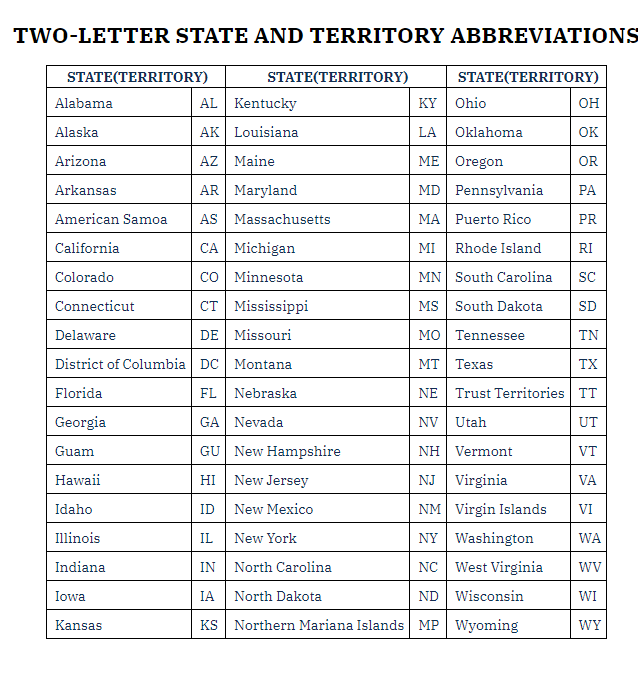

In [62]:
# renombremos las columnas con su traducción al español
df.columns = ['estacion', 'estado', 'latitud', 'longitud', 'msnm', 'fecha', 
              'TMIN_CELSIUS', 'TMAX_CELSIUS', 'TAVG_CELSIUS', 
              'VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA', 
              'DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS', 
              'VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA', 
              'NIEVE_mm', 'PROFUNDIDAD_NIEVE_mm', 'PRECIPITACION_mm']

df.head()

,estacion,estado,latitud,longitud,msnm,fecha,TMIN_CELSIUS,TMAX_CELSIUS,TAVG_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,NIEVE_mm,PROFUNDIDAD_NIEVE_mm,PRECIPITACION_mm
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,20170312,71.06,87.08,80.06,4.473880,360.0,21.027236,0.00000,0.000000,0.000000
1,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170207,-0.76,22.10,13.64,3.802798,360.0,14.092722,0.11811,22.047256,0.000000
2,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170330,37.04,53.96,44.24,4.026492,360.0,19.908766,0.00000,0.000000,0.070866
3,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170622,35.96,73.04,59.72,3.579104,360.0,19.013990,0.00000,0.000000,0.000000
4,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170725,53.06,87.08,71.60,6.039738,360.0,21.922012,0.00000,0.000000,0.000000


In [63]:
show_na_prop(df)

-----------------
TMIN_CELSIUS NAs: 82 Proportion: 0.102 %
-----------------
TMAX_CELSIUS NAs: 91 Proportion: 0.114 %
-----------------
DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS NAs: 8073 Proportion: 10.08 %
-----------------
VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA NAs: 8021 Proportion: 10.015 %
-----------------
NIEVE_mm NAs: 14555 Proportion: 18.173 %
-----------------
PROFUNDIDAD_NIEVE_mm NAs: 7257 Proportion: 9.061 %
-----------------
PRECIPITACION_mm NAs: 78 Proportion: 0.097 %


- Separemos date en mes y año, borremos año.
- Pasemos fareneheint a celsius.

In [64]:
# pasarlo a una función
def date_features(df):
    df['fecha'] = pd.to_datetime(df['fecha'], format='%Y%m%d')
    df['año'] = df['fecha'].dt.year
    df['mes'] = df['fecha'].dt.month
    df['dia'] = df['fecha'].dt.day
    df.drop(columns='fecha', inplace=True)
    return df

# pasarlo a una funcion
def fahrenheit_to_celsius(df):
    df['TMIN_CELSIUS'] = (df['TMIN_CELSIUS'] - 32) * 5/9
    df['TMAX_CELSIUS'] = (df['TMAX_CELSIUS'] - 32) * 5/9
    df['TAVG_CELSIUS'] = (df['TAVG_CELSIUS'] - 32) * 5/9
    return df

date_features(df)
fahrenheit_to_celsius(df)

,estacion,estado,latitud,longitud,msnm,TMIN_CELSIUS,TMAX_CELSIUS,TAVG_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,NIEVE_mm,PROFUNDIDAD_NIEVE_mm,PRECIPITACION_mm,año,mes,dia
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,21.7,30.6,26.7,4.473880,360.0,21.027236,0.00000,0.000000,0.000000,2017,3,12
1,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,-18.2,-5.5,-10.2,3.802798,360.0,14.092722,0.11811,22.047256,0.000000,2017,2,7
2,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2.8,12.2,6.8,4.026492,360.0,19.908766,0.00000,0.000000,0.070866,2017,3,30
3,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2.2,22.8,15.4,3.579104,360.0,19.013990,0.00000,0.000000,0.000000,2017,6,22
4,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,11.7,30.6,22.0,6.039738,360.0,21.922012,0.00000,0.000000,0.000000,2017,7,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80088,ROCKFORD GTR ROCKFORD AP,IL,42.1928,-89.0931,222.5,-8.8,-0.5,-5.0,8.500372,NaN,NaN,0.00000,0.000000,0.000000,2017,3,11
80089,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,10.0,14.4,13.2,6.039738,NaN,NaN,0.00000,0.000000,0.409449,2017,5,11
80090,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,15.6,29.4,21.8,6.934514,NaN,NaN,0.00000,0.000000,0.000000,2017,7,30
80091,DETROIT METRO AP,MI,42.2314,-83.3308,192.3,12.8,22.8,20.2,10.066230,NaN,NaN,0.00000,0.000000,0.000000,2017,8,31


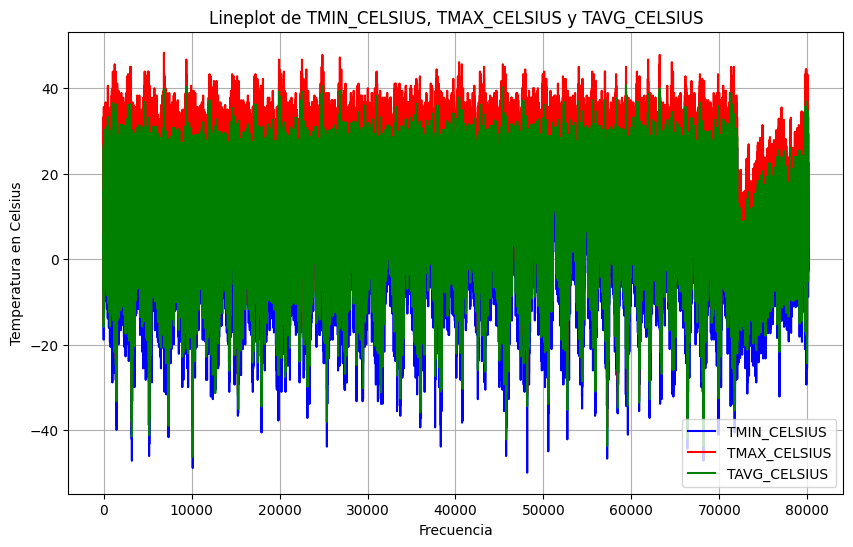

In [65]:
# lineplot de TMIN_CELSIUS, TMIX_CELSIUS y TAVG_CELSIUS

plt.figure(figsize=(10,6))
sns.lineplot(data=df['TMIN_CELSIUS'], color='blue', label='TMIN_CELSIUS')
sns.lineplot(data=df['TMAX_CELSIUS'], color='red', label='TMAX_CELSIUS')
sns.lineplot(data=df['TAVG_CELSIUS'], color='green', label='TAVG_CELSIUS')
plt.legend()
plt.title('Lineplot de TMIN_CELSIUS, TMAX_CELSIUS y TAVG_CELSIUS')
plt.xlabel('Frecuencia')
plt.ylabel('Temperatura en Celsius')
plt.grid()
plt.show()

Con las columnas renombradas, veamos que técnica aplicar para recuperar datos.

In [66]:
# ver que records tienen NA el TMIN_CELSIUS
df[df['TMIN_CELSIUS'].isna()].head()

,estacion,estado,latitud,longitud,msnm,TMIN_CELSIUS,TMAX_CELSIUS,TAVG_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,NIEVE_mm,PROFUNDIDAD_NIEVE_mm,PRECIPITACION_mm,año,mes,dia
1437,GULKANA AP,AK,62.1592,-145.4589,476.1,NaN,NaN,-26.9,1.118470,360.0,6.934514,NaN,NaN,0.000000,2017,1,11
1438,GULKANA AP,AK,62.1592,-145.4589,476.1,NaN,NaN,-23.1,2.013246,360.0,8.947760,NaN,NaN,0.000000,2017,1,19
1439,GULKANA AP,AK,62.1592,-145.4589,476.1,NaN,NaN,-31.7,1.118470,360.0,8.947760,NaN,NaN,0.000000,2017,1,20
1440,GULKANA AP,AK,62.1592,-145.4589,476.1,NaN,NaN,-3.5,4.473880,360.0,17.000744,NaN,NaN,0.031496,2017,1,28
1441,GULKANA AP,AK,62.1592,-145.4589,476.1,NaN,NaN,-16.3,2.908022,360.0,12.974252,NaN,NaN,0.000000,2017,1,30


In [67]:
# ver que records tienen NA la PRECIPITACION_mm
df[df['PRECIPITACION_mm'].isna()].head()

,estacion,estado,latitud,longitud,msnm,TMIN_CELSIUS,TMAX_CELSIUS,TAVG_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,NIEVE_mm,PROFUNDIDAD_NIEVE_mm,PRECIPITACION_mm,año,mes,dia
5111,ANNETTE ISLAND AP,AK,55.0389,-131.5786,33.2,15.6,27.8,21.1,10.513618,340.0,25.053728,0.0,0.0,NaN,2017,8,3
7323,YAKUTAT STATE AP,AK,59.5119,-139.6711,10.1,10.6,16.1,13.0,3.131716,330.0,10.961006,0.0,0.0,NaN,2017,8,23
10054,ANNETTE ISLAND AP,AK,55.0389,-131.5786,33.2,12.8,27.8,19.4,4.250186,320.0,17.000744,0.0,0.0,NaN,2017,8,2
24175,PONCA CITY MUNI AP,OK,36.7367,-97.1019,304.8,21.1,33.9,27.3,8.052984,260.0,35.119958,NaN,NaN,NaN,2017,8,16
31465,YAKUTAT STATE AP,AK,59.5119,-139.6711,10.1,6.1,19.4,13.9,3.355410,230.0,17.000744,0.0,0.0,NaN,2017,8,9


Las columnas de temperatura tienen el promedio completo, pero no en **mínimo** y **máximo**

- Imputación Basada en la Relación con TAVG_CELSIUS:

Dado que TAVG_CELSIUS es el promedio de TMIN_CELSIUS y TMAX_CELSIUS, podemos usar esta relación para imputar los valores faltantes.


Primero imputemos TMIN con la media, luego imputaremos TMAX con la relación correspondiente

$2 * \text{TAVG CELSIUS} - \text{TMIN CELSIUS} = \text{TMAX CELSIUS}$

In [68]:
import pandas as pd

# Paso 1: Imputar valores faltantes con la media o mediana
# Puedes elegir entre media o mediana. Aquí usamos la media, ignorar los valores faltantes en la media
tmin_mean = df['TMIN_CELSIUS'].mean()

# reemplazar los valores faltantes con la media
df['TMIN_CELSIUS'] = df['TMIN_CELSIUS'].fillna(tmin_mean)

# Paso 2: Imputar valores faltantes en TMIN_CELSIUS y TMAX_CELSIUS basados en TAVG_CELSIUS
# Imputar valores faltantes en TMAX_CELSIUS
df['TMAX_CELSIUS'] = df.apply(
    lambda row: 2 * row['TAVG_CELSIUS'] - row['TMIN_CELSIUS'] if pd.isnull(row['TMAX_CELSIUS']) else row['TMAX_CELSIUS'],
    axis=1
)

# Verificar que no hay valores faltantes
show_na_prop(df)

-----------------
DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS NAs: 8073 Proportion: 10.08 %
-----------------
VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA NAs: 8021 Proportion: 10.015 %
-----------------
NIEVE_mm NAs: 14555 Proportion: 18.173 %
-----------------
PROFUNDIDAD_NIEVE_mm NAs: 7257 Proportion: 9.061 %
-----------------
PRECIPITACION_mm NAs: 78 Proportion: 0.097 %


Para la precipitación usaremos la mediana

In [69]:
# reemplazar los na en PRECIPIACION_mm por la mediana
prcp_median = df['PRECIPITACION_mm'].median()

df['PRECIPITACION_mm'] = df['PRECIPITACION_mm'].fillna(prcp_median)

show_na_prop(df)

-----------------
DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS NAs: 8073 Proportion: 10.08 %
-----------------
VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA NAs: 8021 Proportion: 10.015 %
-----------------
NIEVE_mm NAs: 14555 Proportion: 18.173 %
-----------------
PROFUNDIDAD_NIEVE_mm NAs: 7257 Proportion: 9.061 %


Analizemos la dirección del viento más rápido en 5 segundos (En grados)

In [70]:
df['DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS'].unique()

array([360., 350., 340., 330., 320., 310., 300., 290., 280., 270., 260.,
       250., 240., 230., 220., 210., 200., 190., 180., 170., 160., 150.,
       140., 130., 120., 110., 100.,  99.,  90.,  80.,  70.,  60.,  50.,
        40.,  36.,  34.,  31.,  30.,  29.,  24.,  23.,  20.,  14.,  10.,
         5.,   4.,   3.,   2.,  nan])

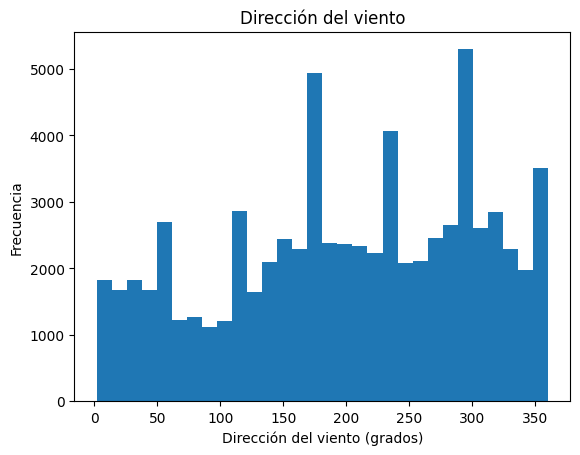

In [71]:
#histograma de la dirección del viento
plt.hist(df['DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS'], bins=30)
plt.xlabel('Dirección del viento (grados)')
plt.ylabel('Frecuencia')
plt.title('Dirección del viento')
plt.show()

In [72]:
# ver los records con dirección del viento que sean NA
df[df['DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS'].isna()].head()

,estacion,estado,latitud,longitud,msnm,TMIN_CELSIUS,TMAX_CELSIUS,TAVG_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,NIEVE_mm,PROFUNDIDAD_NIEVE_mm,PRECIPITACION_mm,año,mes,dia
72020,GUAM INTL AP,GU,13.4836,144.7961,77.4,25.0,31.1,28.2,2.460634,NaN,NaN,0.0,0.000000,0.000000,2017,7,27
72021,GUAM INTL AP,GU,13.4836,144.7961,77.4,26.1,31.7,28.7,4.697574,NaN,NaN,0.0,NaN,0.031496,2017,8,15
72022,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,7.2,30.6,17.1,7.381902,NaN,NaN,0.0,0.000000,0.000000,2017,9,9
72023,Lake Irene,CO,40.4100,-105.8200,3261.4,-8.9,-2.9,-6.7,54.581336,NaN,NaN,NaN,49.015774,0.000000,2017,1,1
72024,Lake Irene,CO,40.4100,-105.8200,3261.4,-7.8,-6.0,-7.1,52.568090,NaN,NaN,NaN,52.007902,0.000000,2017,1,2


Tanto la dirección como la velocidad del viento comparten casi la misma cantidad de valores faltantes, por lo que podríamos a rescindir de ellos

O tal vez ... Podemos usar los vecinos para recuperar sus datos

In [73]:
#uso de knn para imputar valores faltantes para velocidad del viento y dirección del viento
from sklearn.impute import KNNImputer


# Paso 1: Crear un objeto KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Paso 2: Imputar valores faltantes
# Seleccionar las columnas que tienen valores faltantes
columns = ['DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS', 'VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA']

# Imputar valores faltantes
df[columns] = knn_imputer.fit_transform(df[columns])

# resetear el índice
reset_index(df)

# Verificar que no hay valores faltantes
show_na_prop(df)

-----------------
NIEVE_mm NAs: 14555 Proportion: 18.173 %
-----------------
PROFUNDIDAD_NIEVE_mm NAs: 7257 Proportion: 9.061 %


¿Realmente vale la pena usar la nieve como medidor meteorológico? Es un medidor que no se usará realmente en el análisis, sería mucho mejor segregarlo en grupos. Estas 2 columnas serán eliminadas del dataset

In [74]:
# borrar las columnas de nieve
df.drop(columns=['NIEVE_mm', 'PROFUNDIDAD_NIEVE_mm'], inplace=True)

# verificar que no hay valores faltantes
show_na_prop(df)

Veamos como quedó el dataset final

In [75]:
df

,estacion,estado,latitud,longitud,msnm,TMIN_CELSIUS,TMAX_CELSIUS,TAVG_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,PRECIPITACION_mm,año,mes,dia
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,21.7,30.6,26.7,4.473880,360.000000,21.027236,0.000000,2017,3,12
1,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,-18.2,-5.5,-10.2,3.802798,360.000000,14.092722,0.000000,2017,2,7
2,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2.8,12.2,6.8,4.026492,360.000000,19.908766,0.070866,2017,3,30
3,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2.2,22.8,15.4,3.579104,360.000000,19.013990,0.000000,2017,6,22
4,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,11.7,30.6,22.0,6.039738,360.000000,21.922012,0.000000,2017,7,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80088,ROCKFORD GTR ROCKFORD AP,IL,42.1928,-89.0931,222.5,-8.8,-0.5,-5.0,8.500372,200.791002,25.313649,0.000000,2017,3,11
80089,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,10.0,14.4,13.2,6.039738,200.791002,25.313649,0.409449,2017,5,11
80090,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,15.6,29.4,21.8,6.934514,200.791002,25.313649,0.000000,2017,7,30
80091,DETROIT METRO AP,MI,42.2314,-83.3308,192.3,12.8,22.8,20.2,10.066230,200.791002,25.313649,0.000000,2017,8,31


Analizando el año, mes y día, el análisis ocurre solo en el 2017, por lo que la columna año será eliminada. Por otro lado, se presentan meses de enero a setiembre solamente, intuyendo que el análisis fue realizado del 01 de enero de 2017 hasta el 30 de setiembre del mismo.

In [76]:
df['año'].unique()

array([2017])

In [77]:
df['mes'].unique()

array([3, 2, 6, 7, 1, 4, 5, 8, 9])

In [78]:
df['dia'].unique()

array([12,  7, 30, 22, 25,  5, 29, 23,  3, 14,  1,  2, 21, 28, 18, 24, 31,
       13, 15, 16, 17, 26,  9,  8,  6, 11, 27, 20,  4, 10, 19])

In [79]:
#borrar la columna año
df.drop(columns='año', inplace=True)

In [80]:
# resetear indice
reset_index(df)

,estacion,estado,latitud,longitud,msnm,TMIN_CELSIUS,TMAX_CELSIUS,TAVG_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,PRECIPITACION_mm,mes,dia
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,21.7,30.6,26.7,4.473880,360.000000,21.027236,0.000000,3,12
1,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,-18.2,-5.5,-10.2,3.802798,360.000000,14.092722,0.000000,2,7
2,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2.8,12.2,6.8,4.026492,360.000000,19.908766,0.070866,3,30
3,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2.2,22.8,15.4,3.579104,360.000000,19.013990,0.000000,6,22
4,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,11.7,30.6,22.0,6.039738,360.000000,21.922012,0.000000,7,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80088,ROCKFORD GTR ROCKFORD AP,IL,42.1928,-89.0931,222.5,-8.8,-0.5,-5.0,8.500372,200.791002,25.313649,0.000000,3,11
80089,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,10.0,14.4,13.2,6.039738,200.791002,25.313649,0.409449,5,11
80090,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,15.6,29.4,21.8,6.934514,200.791002,25.313649,0.000000,7,30
80091,DETROIT METRO AP,MI,42.2314,-83.3308,192.3,12.8,22.8,20.2,10.066230,200.791002,25.313649,0.000000,8,31


Finalmente, redondeemos a 2 decimales algunas columnas

In [81]:
# redondear a 2 decimales las columnas: VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA, VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA, PRECIPITACION_mm

df['DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS'] = df['DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS'].round(2)
df['VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA'] = df['VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA'].round(2)
df['VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA'] = df['VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA'].round(2)
df['PRECIPITACION_mm'] = df['PRECIPITACION_mm'].round(2)

Ahora sí, la tabla final.

In [82]:
df

,estacion,estado,latitud,longitud,msnm,TMIN_CELSIUS,TMAX_CELSIUS,TAVG_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,PRECIPITACION_mm,mes,dia
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,21.7,30.6,26.7,4.47,360.00,21.03,0.00,3,12
1,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,-18.2,-5.5,-10.2,3.80,360.00,14.09,0.00,2,7
2,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2.8,12.2,6.8,4.03,360.00,19.91,0.07,3,30
3,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2.2,22.8,15.4,3.58,360.00,19.01,0.00,6,22
4,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,11.7,30.6,22.0,6.04,360.00,21.92,0.00,7,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80088,ROCKFORD GTR ROCKFORD AP,IL,42.1928,-89.0931,222.5,-8.8,-0.5,-5.0,8.50,200.79,25.31,0.00,3,11
80089,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,10.0,14.4,13.2,6.04,200.79,25.31,0.41,5,11
80090,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,15.6,29.4,21.8,6.93,200.79,25.31,0.00,7,30
80091,DETROIT METRO AP,MI,42.2314,-83.3308,192.3,12.8,22.8,20.2,10.07,200.79,25.31,0.00,8,31


Recuperamos las temperaturas usando la media para el TMIN, y recuperando el TMAX reemplazando, pero vemos que las temperaturas máximas se disparan

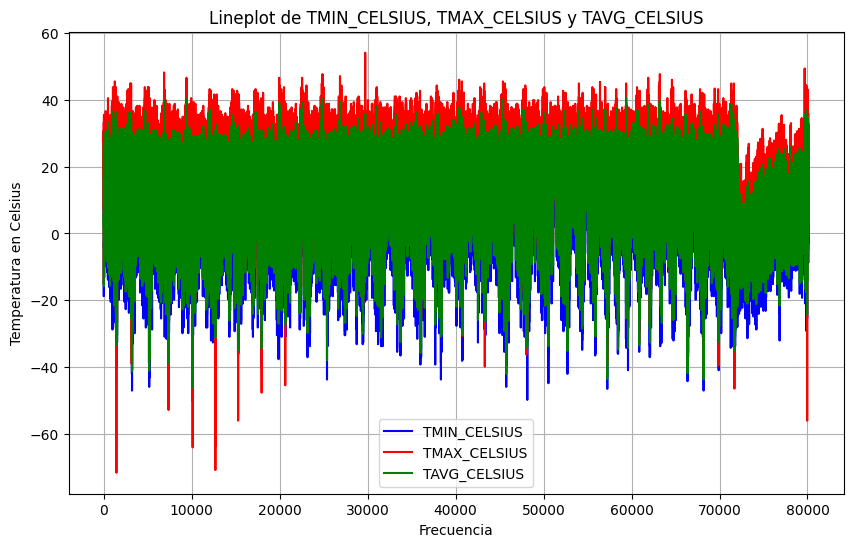

In [83]:
# lineplot de TMIN_CELSIUS, TMIX_CELSIUS y TAVG_CELSIUS

plt.figure(figsize=(10,6))
sns.lineplot(data=df['TMIN_CELSIUS'], color='blue', label='TMIN_CELSIUS')
sns.lineplot(data=df['TMAX_CELSIUS'], color='red', label='TMAX_CELSIUS')
sns.lineplot(data=df['TAVG_CELSIUS'], color='green', label='TAVG_CELSIUS')
plt.legend()
plt.title('Lineplot de TMIN_CELSIUS, TMAX_CELSIUS y TAVG_CELSIUS')
plt.xlabel('Frecuencia')
plt.ylabel('Temperatura en Celsius')
plt.grid()
plt.show()

Como última decisión, es eliminar las columnas de temperatura mínima y máxima, porque nos importa más el promedio en el día

In [84]:
# borrar TMIN_CELSIUS y TMAX_CELSIUS
df.drop(columns=['TMIN_CELSIUS', 'TMAX_CELSIUS'], inplace=True)

# resetear el índice
reset_index(df)

,estacion,estado,latitud,longitud,msnm,TAVG_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,PRECIPITACION_mm,mes,dia
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,26.7,4.47,360.00,21.03,0.00,3,12
1,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,-10.2,3.80,360.00,14.09,0.00,2,7
2,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,6.8,4.03,360.00,19.91,0.07,3,30
3,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,15.4,3.58,360.00,19.01,0.00,6,22
4,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,22.0,6.04,360.00,21.92,0.00,7,25
...,...,...,...,...,...,...,...,...,...,...,...,...
80088,ROCKFORD GTR ROCKFORD AP,IL,42.1928,-89.0931,222.5,-5.0,8.50,200.79,25.31,0.00,3,11
80089,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,13.2,6.04,200.79,25.31,0.41,5,11
80090,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,21.8,6.93,200.79,25.31,0.00,7,30
80091,DETROIT METRO AP,MI,42.2314,-83.3308,192.3,20.2,10.07,200.79,25.31,0.00,8,31


Renombremos a TEMPERATURA_PROMEDIO_CELSIUS

In [85]:
# renombrar la columna TAVG_CELSIUS a TEMPERATURA_CELSIUS
df.rename(columns={'TAVG_CELSIUS': 'TEMPERATURA_CELSIUS'}, inplace=True)

# resetear el índice
reset_index(df)

,estacion,estado,latitud,longitud,msnm,TEMPERATURA_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,PRECIPITACION_mm,mes,dia
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,26.7,4.47,360.00,21.03,0.00,3,12
1,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,-10.2,3.80,360.00,14.09,0.00,2,7
2,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,6.8,4.03,360.00,19.91,0.07,3,30
3,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,15.4,3.58,360.00,19.01,0.00,6,22
4,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,22.0,6.04,360.00,21.92,0.00,7,25
...,...,...,...,...,...,...,...,...,...,...,...,...
80088,ROCKFORD GTR ROCKFORD AP,IL,42.1928,-89.0931,222.5,-5.0,8.50,200.79,25.31,0.00,3,11
80089,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,13.2,6.04,200.79,25.31,0.41,5,11
80090,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,21.8,6.93,200.79,25.31,0.00,7,30
80091,DETROIT METRO AP,MI,42.2314,-83.3308,192.3,20.2,10.07,200.79,25.31,0.00,8,31


Por última vez, el dataset final

In [86]:
df

,estacion,estado,latitud,longitud,msnm,TEMPERATURA_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,PRECIPITACION_mm,mes,dia
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,26.7,4.47,360.00,21.03,0.00,3,12
1,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,-10.2,3.80,360.00,14.09,0.00,2,7
2,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,6.8,4.03,360.00,19.91,0.07,3,30
3,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,15.4,3.58,360.00,19.01,0.00,6,22
4,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,22.0,6.04,360.00,21.92,0.00,7,25
...,...,...,...,...,...,...,...,...,...,...,...,...
80088,ROCKFORD GTR ROCKFORD AP,IL,42.1928,-89.0931,222.5,-5.0,8.50,200.79,25.31,0.00,3,11
80089,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,13.2,6.04,200.79,25.31,0.41,5,11
80090,PITTSBURGH INTL AP,PA,40.4847,-80.2144,366.7,21.8,6.93,200.79,25.31,0.00,7,30
80091,DETROIT METRO AP,MI,42.2314,-83.3308,192.3,20.2,10.07,200.79,25.31,0.00,8,31


Con el dataset listo, **el manejo de valores faltantes ha concluido**.

Guardaremos el csv con un nuevo nombre: weather_clean.csv

In [87]:
# guardar el df limpio como weather_clean.csv
df.to_csv('weather_clean.csv', index=False)

# ANÁLISIS EXPLORATORIO DE DATOS

1. **¿Cómo varía la temperatura media diaria a lo largo de los meses de EE. UU.?**
   - Esta pregunta explora los patrones de temperatura media durante el año (tanto mes como día).

**Hipótesis: Temperatura variable debido a el espacio geográfico del país.**

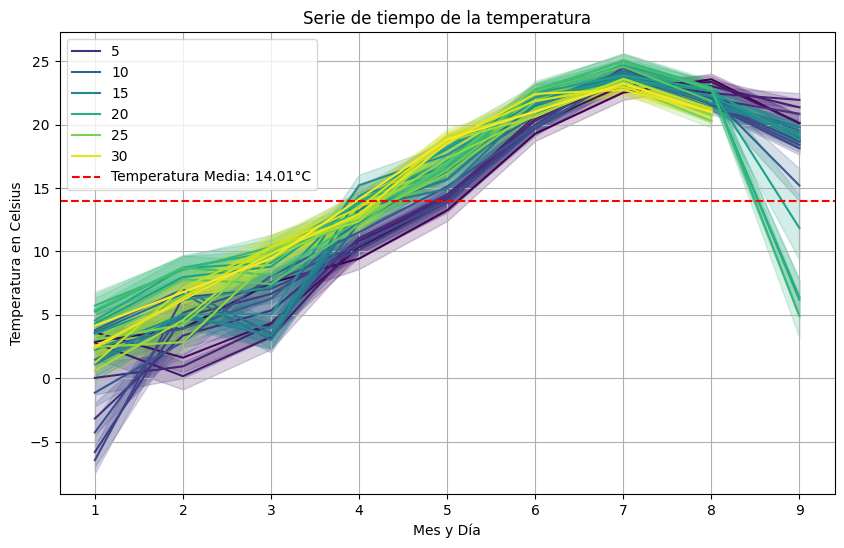

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un nuevo DataFrame con 'mes' y 'dia' como índice
df_new = df.copy()
df_new.set_index(['mes', 'dia'], inplace=True)

# Asegurarse de que los valores en 'TEMPERATURA_CELSIUS' sean numéricos
df_new['TEMPERATURA_CELSIUS'] = pd.to_numeric(df_new['TEMPERATURA_CELSIUS'], errors='coerce')

# Eliminar filas con valores NaN en 'TEMPERATURA_CELSIUS'
df_new.dropna(subset=['TEMPERATURA_CELSIUS'], inplace=True)

# Graficar la serie de tiempo de la temperatura
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_new.reset_index(), x='mes', y='TEMPERATURA_CELSIUS', hue='dia', palette='viridis', legend='auto')

# Agregar una línea adicional en la serie de tiempo
# Por ejemplo, una línea horizontal en la temperatura media
mean_temp = df_new['TEMPERATURA_CELSIUS'].mean()
plt.axhline(y=mean_temp, color='red', linestyle='--', label=f'Temperatura Media: {mean_temp:.2f}°C')

plt.title('Serie de tiempo de la temperatura')
plt.xlabel('Mes y Día')
plt.ylabel('Temperatura en Celsius')
plt.legend()
plt.grid()
plt.show()

Podemos apreciar que la serie de tiempo coincide con la ubicación geográfica en la que se hizo el reporte diario. ¿Cómo nos damos cuenta de esto?

El análisis de datos es en base a un **reporte climatológico registrado en diferentes estaciones en los Estados Unidos en el año 2017 en los 9 primeros meses de dicho año**. Dichas estaciones, son **aeropuertos**.

Dicha serie temporal, muestra como la temperatura promedio a lo largo del año es de aprox 14.01 grados centígrados. Su variación es creciente hasta aprox el mes de julio y agosto, lo cual muestra el solsticio de verano en el **hemisferio norte**, ya que es de saber que funciona así:

- Solsticio de Invierno: Diciembre (mes12) => Marzo (mes 3) $\\$
- Equinoccio de Primavera: Marzo (mes 3) => Junio (mes 6) $\\$
- Solsticio de Verano: Junio (mes 6) => Setiembre (mes 9) $\\$
- Equinoccio de Otoño: Setiembre (mes 9) => Diciembre (mes 12)

Fuente: (https://www.metoffice.gov.uk/weather/learn-about/weather/seasons/equinox-and-solstice#:~:text=The%20Equinox%20in%20the%20Northern,September%20(the%20autumn%20equinox).)

2. **¿Existe alguna relación entre la velocidad del viento y las precipitaciones registradas?**
   - Explora si hay una correlación entre los días con mayor velocidad del viento y la precipitación registrada. Es decir, si la aparición de fenómenos naturales como la lluvia, huracanes, etc, son ocasionadas a medida que el viento se intensifica.

**Hipótesis: Sí existe dicha relación, pero no es alta.**

C:\Users\Godel\AppData\Local\Temp\ipykernel_25400\383411814.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


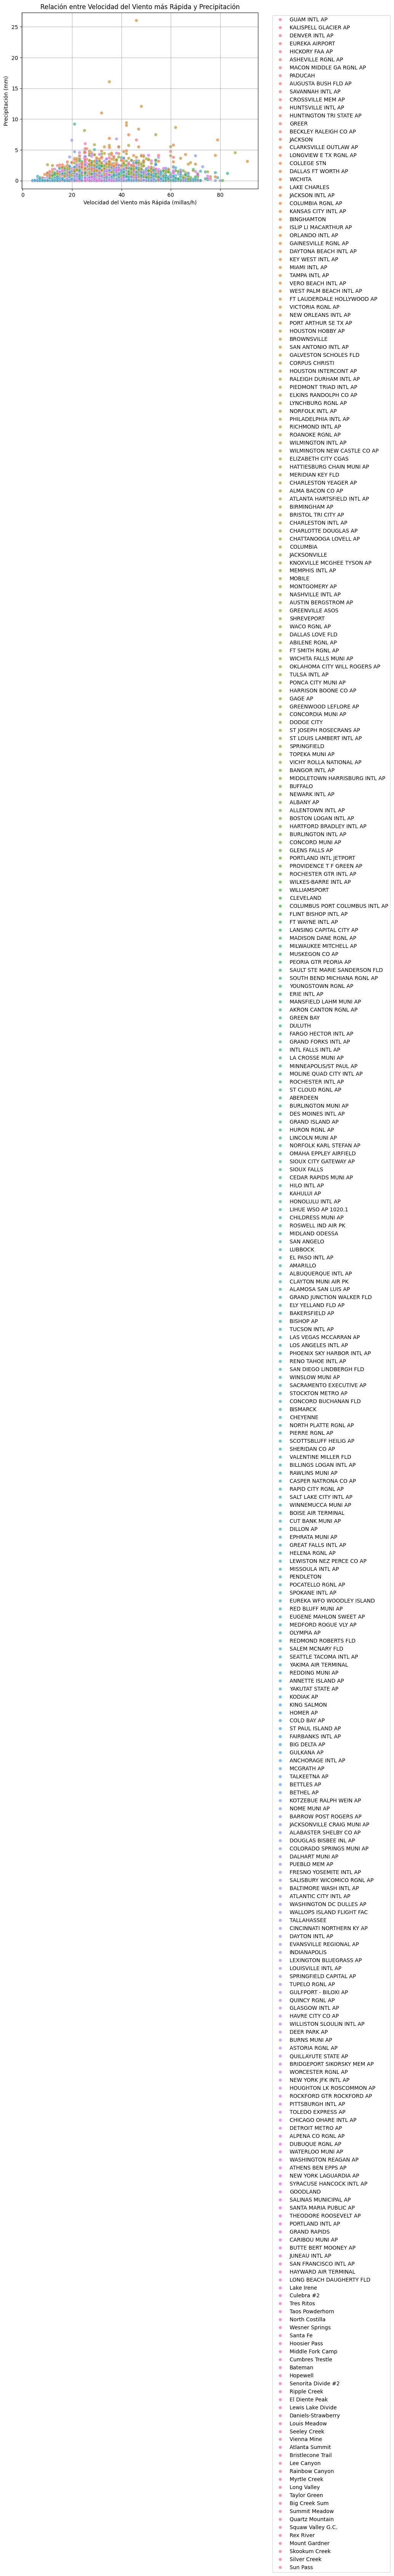

In [89]:
# Scatter plot entre velocidad del viento más rápida y precipitación
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA', y='PRECIPITACION_mm', hue='estacion', alpha=0.7)
plt.title('Relación entre Velocidad del Viento más Rápida y Precipitación')
plt.xlabel('Velocidad del Viento más Rápida (millas/h)')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Distribución de la precipitación respecto a la velocidad del viento**:
   - La mayoría de los puntos de datos están concentrados en los valores bajos de precipitación (menores a 5 mm) y velocidad del viento (menores a 40 millas por hora). Esto indica que en la mayoría de los casos, no hay precipitaciones extremadamente altas cuando la velocidad del viento es alta, sugiriendo que estos fenómenos pueden no estar fuertemente correlacionados.

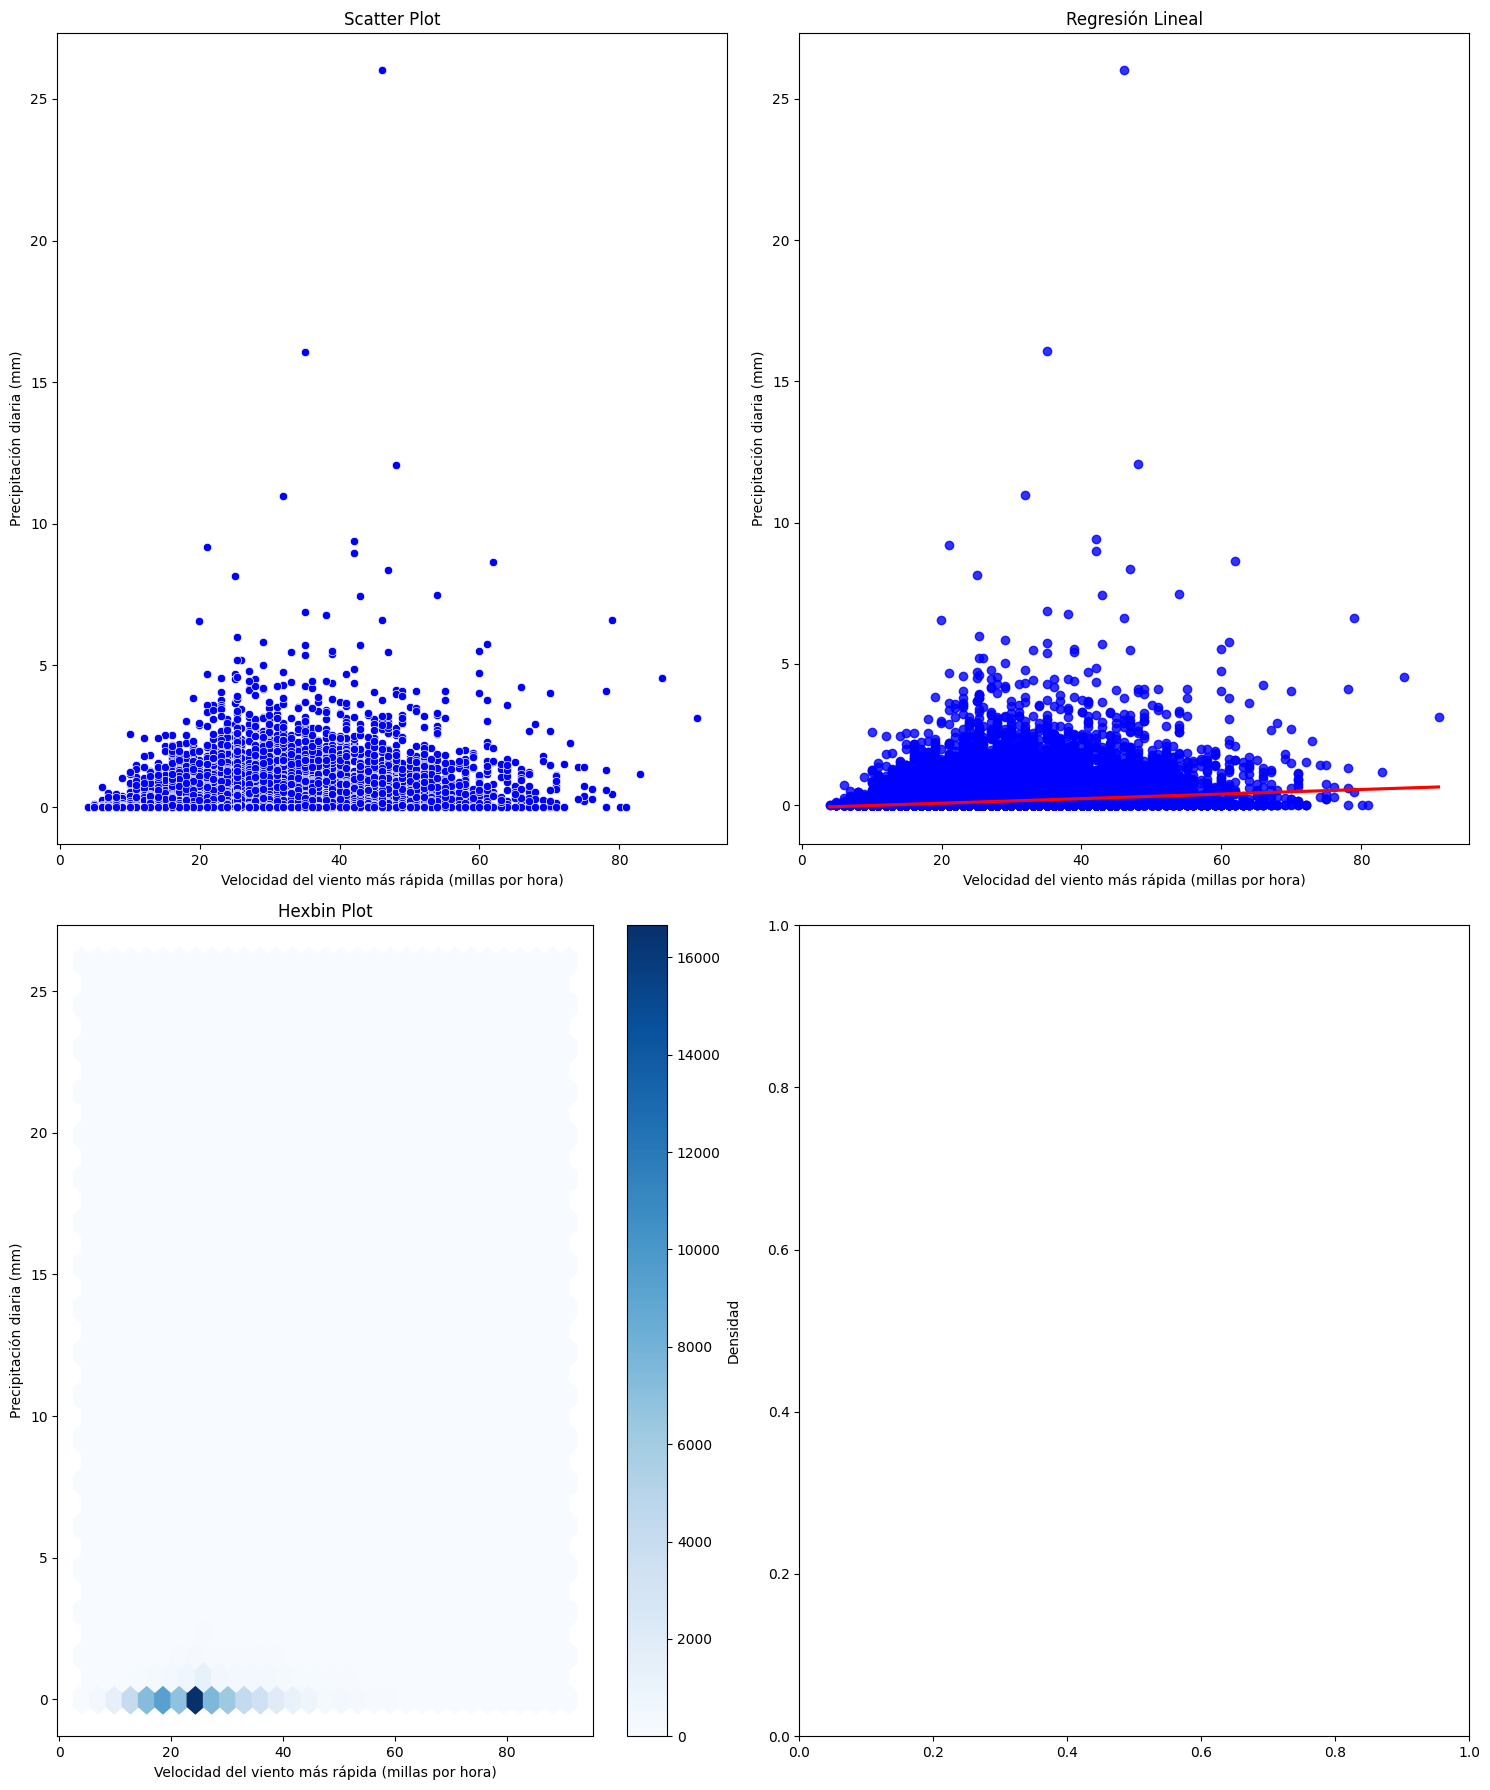

In [90]:
'''
2. **¿Cuál es la relación entre la velocidad del viento más rápida en 5 segundos (VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA) y la precipitación diaria (PRECIPITACION_mm)?**
   - Explora si hay una correlación entre los días con mayor velocidad del viento y la precipitación registrada.
'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 18))

# Gráfico de Dispersión (Scatter Plot)
sns.scatterplot(data=df, x='VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA', y='PRECIPITACION_mm', color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot')
axes[0, 0].set_xlabel('Velocidad del viento más rápida (millas por hora)')
axes[0, 0].set_ylabel('Precipitación diaria (mm)')

# Gráfico de Regresión (Regresión Lineal)
sns.regplot(data=df, x='VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA', y='PRECIPITACION_mm', color='blue', line_kws={"color": "red"}, ax=axes[0, 1])
axes[0, 1].set_title('Regresión Lineal')
axes[0, 1].set_xlabel('Velocidad del viento más rápida (millas por hora)')
axes[0, 1].set_ylabel('Precipitación diaria (mm)')

# Gráfico de Hexágonos (Hexbin Plot)
hb = axes[1, 0].hexbin(df['VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA'], df['PRECIPITACION_mm'], gridsize=30, cmap='Blues')
axes[1, 0].set_title('Hexbin Plot')
axes[1, 0].set_xlabel('Velocidad del viento más rápida (millas por hora)')
axes[1, 0].set_ylabel('Precipitación diaria (mm)')
fig.colorbar(hb, ax=axes[1, 0], label='Densidad')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

plt.show()

### Insights logrados:
1. **Distribución de la precipitación respecto a la velocidad del viento**:
- La mayoría de los puntos de datos están concentrados en los valores bajos de precipitación (menores a 5 mm) y velocidad del viento (menores a 40 a 60 millas por hora). Esto indica que en la mayoría de los casos, **no hay precipitaciones extremadamente altas cuando la velocidad del viento es alta, sugiriendo que estos fenómenos pueden no estar fuertemente correlacionados.**

2. **Regresión lineal**:
- La línea de regresión (con una pendiente casi horizontal) refuerza la idea de que hay muy poca correlación entre la velocidad del viento más rápida y la cantidad de precipitación. **Esto puede implicar que, a pesar de los fuertes vientos, no siempre se asocian con lluvias intensas.**

3. **Hexbin Plot**:
- El hexbin plot muestra una concentración más densa en valores bajos de velocidad del viento y precipitación, lo que respalda la observación de que la mayoría de los días con viento no presentan precipitaciones significativas. Por lo que, la baja densidad en velocidades superiores a las 60 mph también refuerza la rareza de fenómenos climáticos extremos con alta velocidad del viento y alta precipitación.

### **Conclusión:**
En base a los gráficos, podemos decir que **no parece haber una correlación significativa entre la velocidad del viento más rápida y la precipitación**. Esto podría implicar que los días con fuertes vientos no necesariamente traen precipitaciones intensas, al menos en los datos analizados. Este tipo de hallazgo es importante para estudios sobre la predicción de fenómenos meteorológicos.

3. **¿Cuántas estaciones experimentaron las mayores velocidades de viento promedio diario en el año 2017?**
   - Se trata de identificar las áreas con mayores vientos promedio, lo cual puede ser relevante para estudios climáticos o de infraestructura.

**Hipótesis: Velocidades de viento baja, debido a infraestructura eficiente.**

C:\Users\Godel\AppData\Local\Temp\ipykernel_25400\2824356239.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wind_speed_ranges.index.astype(str), y=wind_speed_ranges.values, palette='viridis')


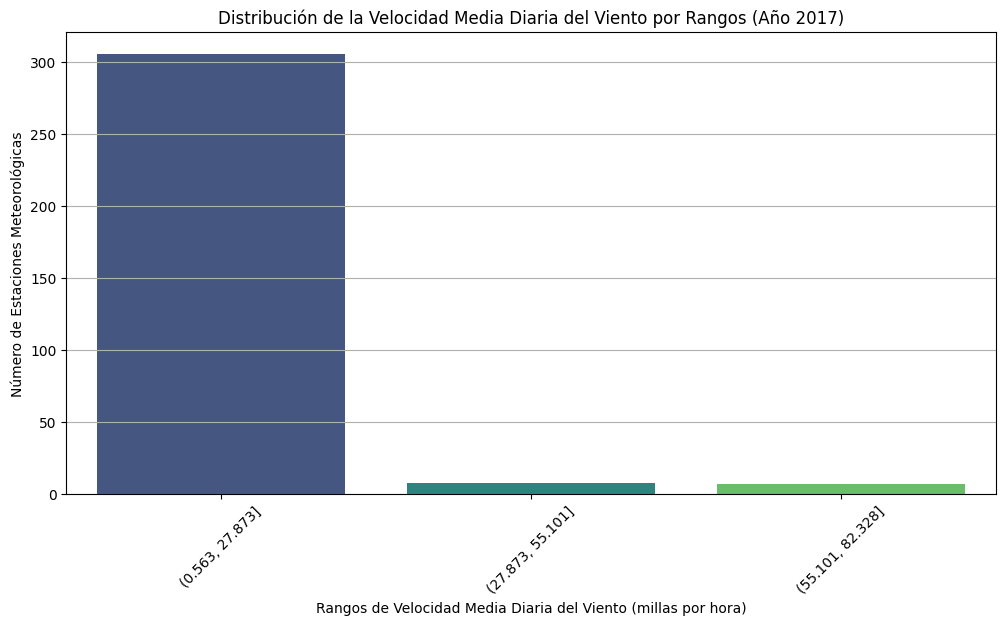

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la velocidad media diaria del viento por estación meteorológica
avg_wind_speed = df.groupby('estacion')['VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA'].mean()

# Crear rangos para la velocidad media diaria del viento
num_bins = 3
bins = pd.cut(avg_wind_speed, bins=num_bins)

# Contar el número de estaciones en cada rango
wind_speed_ranges = bins.value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=wind_speed_ranges.index.astype(str), y=wind_speed_ranges.values, palette='viridis')
plt.title('Distribución de la Velocidad Media Diaria del Viento por Rangos (Año 2017)')
plt.xlabel('Rangos de Velocidad Media Diaria del Viento (millas por hora)')
plt.ylabel('Número de Estaciones Meteorológicas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Insight logrado:

1. **Velocidad media diaria del viento por estación**:
- Observamos que hay una **variación significativa en la velocidad media diaria del viento** entre las diferentes estaciones meteorológicas. Sin embargo, la mayoría de las estaciones presentan velocidades de viento relativamente bajas (menos de 30 millas por hora). Solo algunas estaciones se destacan con velocidades medias más altas registradas.
   
2. **Distribución de la velocidad del viento por rangos**:
- La distribución muestra que la mayoría de las estaciones están concentradas en el rango más bajo de velocidad del viento (entre 0.56 y 27.87 millas por hora). **Esto implica que los vientos más fuertes son poco comunes en la mayoría de las estaciones registradas.** Muy pocas estaciones tienen vientos con velocidades promedio superiores a 55 millas por hora.
   
3. **Relevancia para estudios climáticos**:
- Este análisis es útil para identificar las **regiones con mayores vientos promedio**, que pueden ser zonas relevantes para la generación de energía eólica o para la planificación de infraestructuras resistentes al viento. También puede ser interesante correlacionar estas zonas con otras variables climáticas para detectar posibles patrones.

### **Posible conclusión:**
La mayoría de las estaciones meteorológicas en los EE.UU. en 2017 experimentaron velocidades de viento relativamente moderadas, con solo algunas estaciones mostrando vientos significativamente más altos. Este tipo de información puede ser útil para estudios de infraestructura y energías renovables, además de ayudar a planificar mejor en áreas vulnerables a vientos fuertes. 

Por otro lado, **este análisis cubre los 9 primeros meses del año**, combinando nuestro primer insight (Serie temporal de variación de la temperatura media) los últimos 3 meses del año pertenecen al **equinoccio de otoño**, justamente el período del año con mayor incidencia de viento.

Fuente: (https://www.quora.com/Why-does-the-wind-blow-extra-hard-in-the-Autumn)



4. **¿Cómo varía la precipitación total en base a diferentes grupos de estaciones meteorológicas a lo largo de los meses?**
   - Aquí se investigan las fluctuaciones en las precipitaciones a lo largo del año, comparando diferentes estaciones.

Debido a que las estaciones son **aeropuertos alrededor de todo Estados Unidos**, podemos sectorizar en 5 rangos, basado en **los mm de la precipitación**, de esta manera clusterizar en grupos de aeropuertos donde es mucho más frecuente las precipitaciones o son mucho más intensas.

**Hipótesis: Uno de los grupos resaltará con precipitaciones altas.**

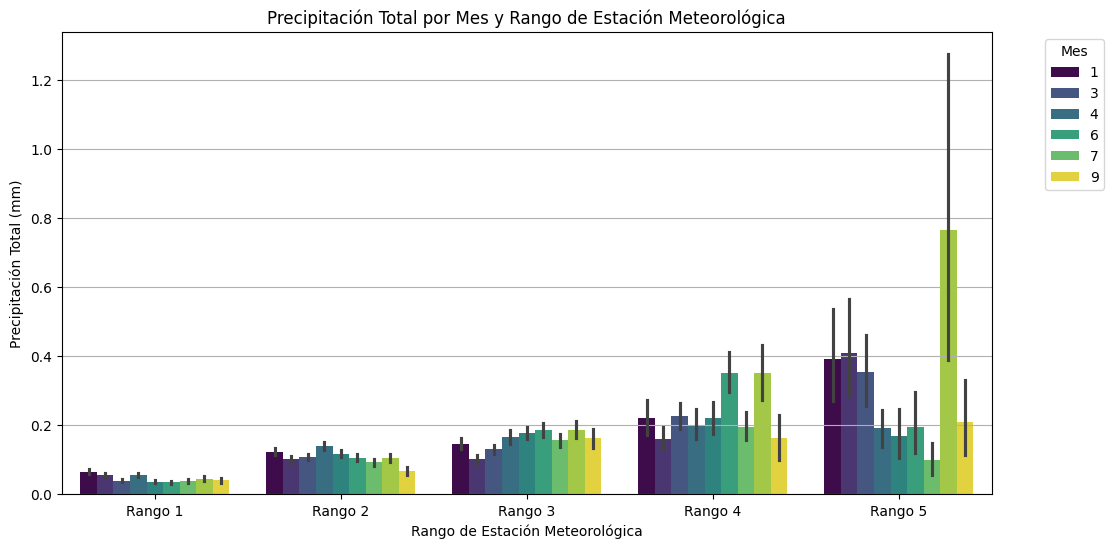

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la precipitación total por estación meteorológica
total_precipitation = df.groupby('estacion')['PRECIPITACION_mm'].sum()

# Crear rangos para las estaciones meteorológicas
num_bins = 5
bins = pd.cut(total_precipitation, bins=num_bins, labels=[f'Rango {i+1}' for i in range(num_bins)])

# Asignar los rangos al DataFrame original
df['rango_estacion'] = df['estacion'].map(bins)

# Crear un gráfico de barras agrupado por mes y rango de estación meteorológica
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='rango_estacion', y='PRECIPITACION_mm', hue='mes', palette='viridis')
plt.title('Precipitación Total por Mes y Rango de Estación Meteorológica')
plt.xlabel('Rango de Estación Meteorológica')
plt.ylabel('Precipitación Total (mm)')
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

### Insight logrado:

1. **Precipitación total por mes y estación**:
- Las estaciones meteorológicas clasificadas en el **Rango 5** (las que experimentaron las precipitaciones más altas) muestran una mayor variabilidad en la precipitación total, especialmente en el mes 8 (agosto). Esto podría indicar que estas estaciones están ubicadas en regiones más propensas a lluvias intensas o en áreas geográficas específicas con climas más húmedos. En contraste, las estaciones en los **Rangos 1, 2 y 3** experimentaron precipitaciones mucho más bajas y constantes a lo largo de los meses, lo que sugiere que están ubicadas en regiones más secas o menos propensas a lluvias intensas.

2. **Variación mensual**:
- La precipitación tiende a aumentar en los meses de verano (6 a 9), lo cual puede estar asociado con **ciclones tropicales, tormentas de verano** u otros fenómenos meteorológicos estacionales comunes en esas fechas. En los primeros meses del año (1 y 3), la precipitación es generalmente más baja en todos los rangos, lo que sugiere que en esas estaciones no hay grandes tormentas o fenómenos relacionados con lluvias, pero sí cabe la posibilidad de **que la nieve sea frecuente**.

3. **Rangos de estaciones**:
- El análisis de rangos de estaciones meteorológicas muestra que solo unas pocas estaciones (en los rangos superiores) contribuyen a las precipitaciones más altas, mientras que la mayoría de las estaciones tienen valores bajos de precipitación. Esto puede estar relacionado con la **distribución geográfica** de las estaciones, donde ciertas regiones (probablemente costeras o montañosas) experimentan lluvias más intensas.

### **Conclusión preliminar:**
Las precipitaciones varían considerablemente entre las estaciones meteorológicas y los meses del año, con una mayor concentración de lluvias en ciertos meses de verano y en estaciones específicas que registran las mayores precipitaciones. Este tipo de análisis es relevante para la gestión de recursos hídricos y la preparación ante eventos climáticos extremos.

## **CASO PARTICULAR: ITINERARIO DE VIAJE**

En base a lo encontrado, les presento a 2 personas, ellos son Yhair Huertas y Luis Cubillas, **2 grandes amigos amantes del clima cálido**, es por ello que se han planteado como objetivo realizar un viaje a los Estados Unidos, con destino a **Florida**. Ellos han investigado y saben que su lugar de destino está situado en la costa del país y el clima es ideal para su gusto.

Es por ello que recurren a datos metereológicos, de manera que puedan predecir la temperatura en **Florida** en diferentes épocas del año.

Debido a que todas las **estaciones son aeropuertos**, y la cantidad de aeropuertos en EEUU es muy grande, nos centraremos en un solo estado, el cual es el estado más concurrido del país, **Florida**.


Fuente: (https://www.airalo.com/blog/the-top-5-us-states-to-visit-for-international-travelers#:~:text=1.,Florida&text=Florida%20saw%20just%20a%20nearly,Disney%20World%20and%20Universal%20Studios)

## Dataset filtrado para Florida

In [93]:
## primero filtremos el estado FL (Florida)
df_fl_ap = df[(df['estado'] == 'FL')]
reset_index(df_fl_ap)
df_fl_ap

,estacion,estado,latitud,longitud,msnm,TEMPERATURA_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,PRECIPITACION_mm,mes,dia,rango_estacion
0,ORLANDO INTL AP,FL,28.4339,-81.3250,27.4,6.9,15.88,360.00,29.08,0.00,1,8,Rango 3
1,ORLANDO INTL AP,FL,28.4339,-81.3250,27.4,16.5,10.07,360.00,25.05,0.00,2,10,Rango 3
2,ORLANDO INTL AP,FL,28.4339,-81.3250,27.4,19.6,9.62,360.00,38.92,0.20,2,23,Rango 3
3,GAINESVILLE RGNL AP,FL,29.6919,-82.2756,37.5,28.2,4.70,360.00,23.94,0.17,7,4,Rango 4
4,DAYTONA BEACH INTL AP,FL,29.1828,-81.0483,9.4,26.4,3.80,360.00,36.01,2.51,6,26,Rango 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,JACKSONVILLE CRAIG MUNI AP,FL,30.3361,-81.5147,12.5,27.1,3.80,200.79,25.31,0.02,8,6,Rango 3
3103,JACKSONVILLE CRAIG MUNI AP,FL,30.3361,-81.5147,12.5,25.0,7.83,200.79,25.31,0.04,8,28,Rango 3
3104,TALLAHASSEE,FL,30.3975,-84.3289,19.2,18.4,6.04,200.79,25.31,0.00,1,16,Rango 3
3105,TALLAHASSEE,FL,30.3975,-84.3289,19.2,23.9,4.92,200.79,25.31,3.92,6,6,Rango 3


## Mostrar las estaciones únicas en el dataset de Florida

In [94]:
df_fl_ap['estacion'].unique()

array(['ORLANDO INTL AP', 'GAINESVILLE RGNL AP', 'DAYTONA BEACH INTL AP',
       'KEY WEST INTL AP', 'MIAMI INTL AP', 'TAMPA INTL AP',
       'VERO BEACH INTL AP', 'WEST PALM BEACH INTL AP',
       'FT LAUDERDALE HOLLYWOOD AP', 'JACKSONVILLE',
       'JACKSONVILLE CRAIG MUNI AP', 'TALLAHASSEE'], dtype=object)

# Mostrar los rangos de estaciones únicas en el dataset de Florida

In [95]:
df_fl_ap['rango_estacion'].unique()

['Rango 3', 'Rango 4', 'Rango 2']
Categories (5, object): ['Rango 1' < 'Rango 2' < 'Rango 3' < 'Rango 4' < 'Rango 5']

Al filtrar en el estado de Florida, solo nos quedamos con los rangos 2, 3 y 4 de estaciones clusterizadas, las cuales **presentan precipitaciones muy ligeras**, priorizando el calor y no la humedad. 

Conozcamos que estaciones forman parte de cada rango.

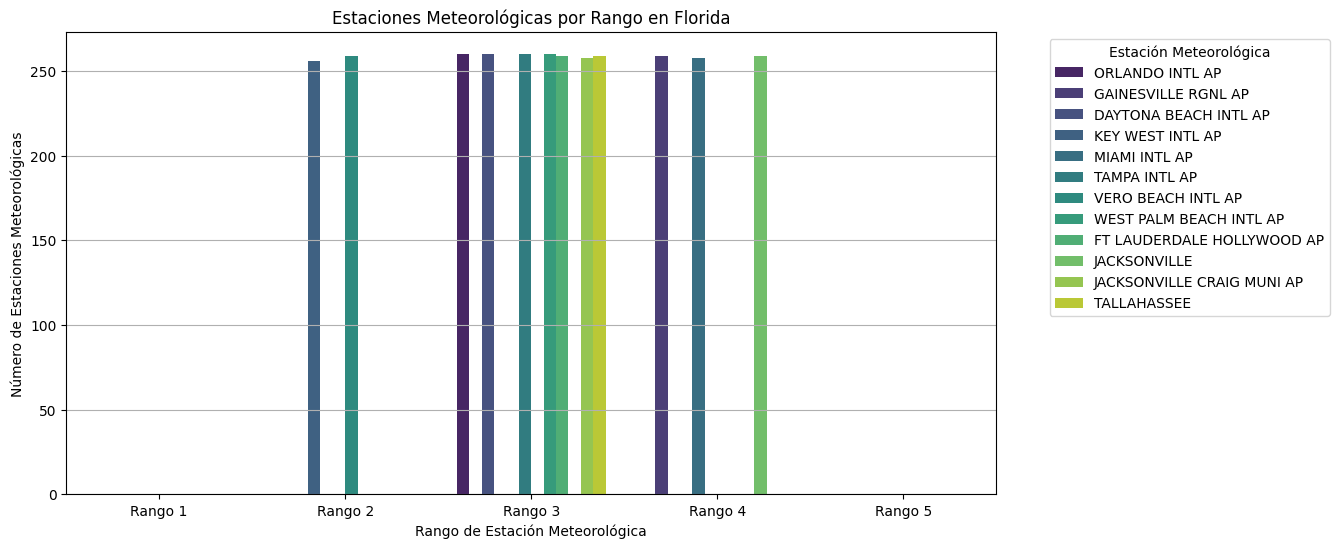

In [96]:
# Que estaciones forman parte de cada rango de estación meteorológica en Florida

# Crear un gráfico de barras apilado
plt.figure(figsize=(12, 6))
sns.countplot(data=df_fl_ap, x='rango_estacion', hue='estacion', palette='viridis')
plt.title('Estaciones Meteorológicas por Rango en Florida')
plt.xlabel('Rango de Estación Meteorológica')
plt.ylabel('Número de Estaciones Meteorológicas')
plt.legend(title='Estación Meteorológica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

Los amigos, amantes del clima cálido, deberían tener en cuenta los lugares con menor **intensidad de precipitaciones**. Por lo que aquellos pertenecientes al rango 2 o 3, deberían ser la prioridad de visita.

Dibujemos el mapa de florida y las **estaciones en este**.

c:\Users\Godel\Documents\PYTHON\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


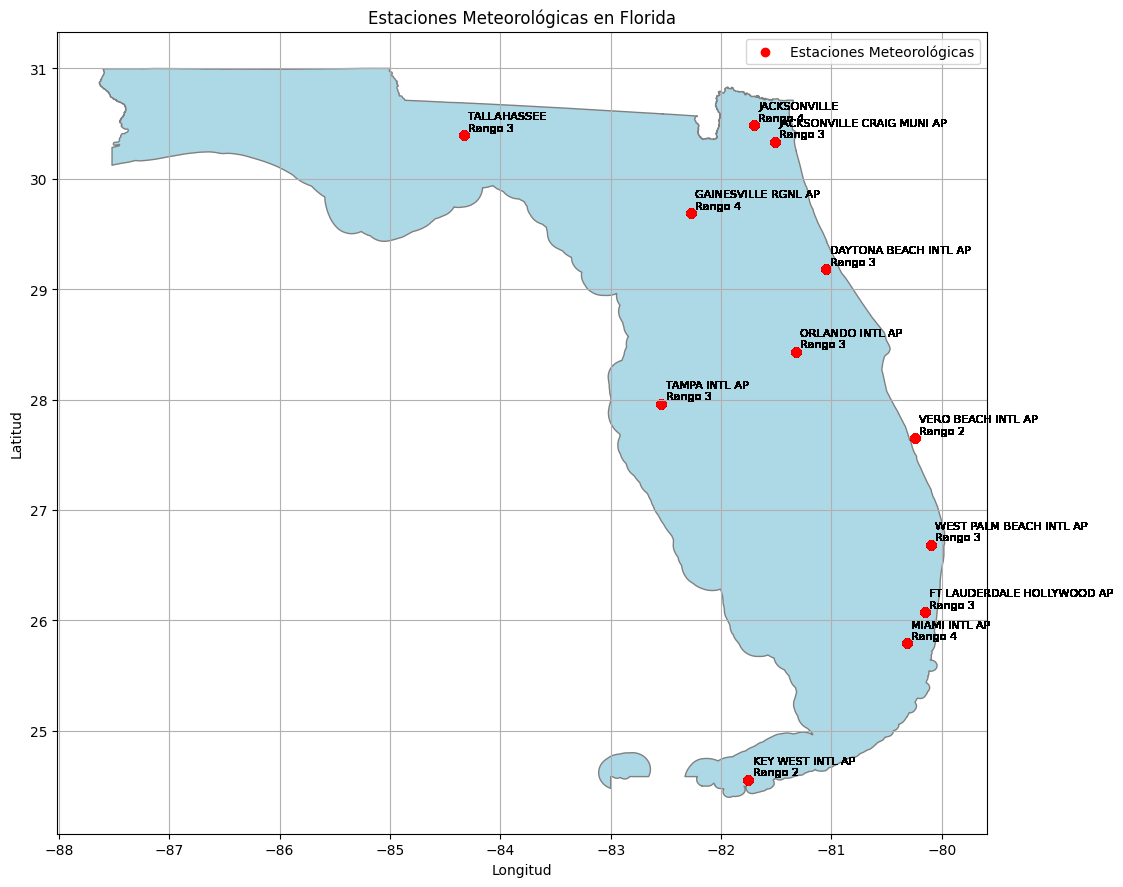

In [97]:
# Dibujemos el mapa de Florida y las estaciones en este.

import osmnx
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear un mapa de Florida
florida = osmnx.geocode_to_gdf('Florida, USA')

# Crear un GeoDataFrame con las estaciones meteorológicas en Florida
gdf_stations = gpd.GeoDataFrame(df_fl_ap, geometry=gpd.points_from_xy(df_fl_ap['longitud'], df_fl_ap['latitud']))

# Crear un mapa de Florida con las estaciones meteorológicas
fig, ax = plt.subplots(figsize=(12, 12))
florida.plot(ax=ax, facecolor='lightblue', edgecolor='gray')
gdf_stations.plot(ax=ax, color='red', label='Estaciones Meteorológicas')

# Agregar el nombre de cada estación y su rango en el mapa
for x, y, label, rango in zip(gdf_stations.geometry.x, gdf_stations.geometry.y, gdf_stations['estacion'], gdf_stations['rango_estacion']):
    ax.annotate(f'{label}\n{rango}', xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8, color='black')

plt.title('Estaciones Meteorológicas en Florida')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid()
plt.show()

Ahora veamos donde se encuentra la temperatura media mayor según cada estación

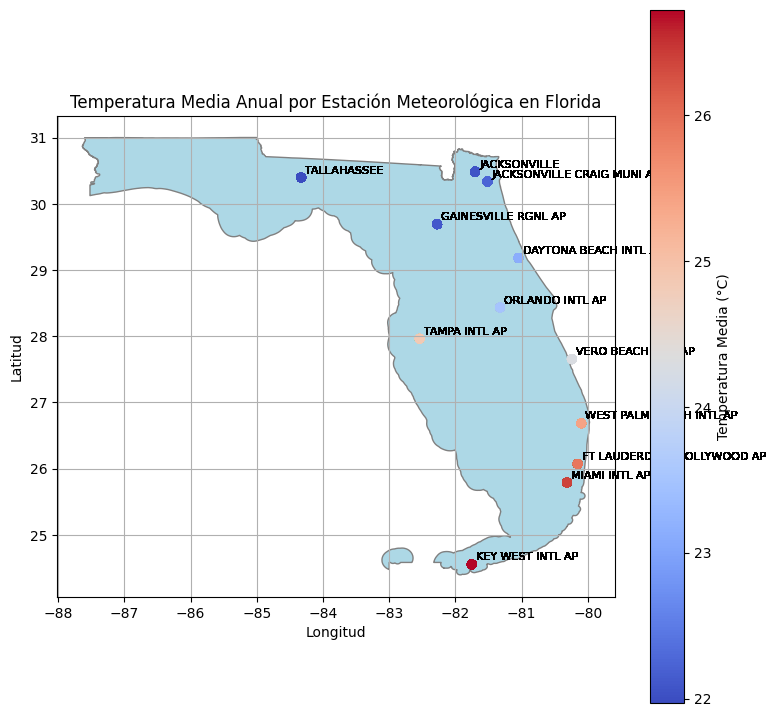

In [98]:
# Ahora veamos donde se encuentra la temperatura media mayor según cada estación meteorológica en Florida.

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Calcular la temperatura media por estación meteorológica y por mes
avg_temp_monthly = df_fl_ap.groupby(['estacion', 'mes'])['TEMPERATURA_CELSIUS'].mean().reset_index()

# Calcular la temperatura media anual por estación meteorológica
avg_temp_annual = avg_temp_monthly.groupby('estacion')['TEMPERATURA_CELSIUS'].mean()

# Unir la temperatura media anual con el GeoDataFrame de estaciones
gdf_stations['TEMPERATURA_MEDIA'] = gdf_stations['estacion'].map(avg_temp_annual)

# Crear un mapa de Florida con las estaciones meteorológicas y la temperatura media
fig, ax = plt.subplots(figsize=(9, 9))
florida.plot(ax=ax, facecolor='lightblue', edgecolor='gray')
gdf_stations.plot(ax=ax, column='TEMPERATURA_MEDIA', cmap='coolwarm', legend=True, legend_kwds={'label': 'Temperatura Media (°C)'})

# Agregar el nombre de cada estación en el mapa
for x, y, label in zip(gdf_stations.geometry.x, gdf_stations.geometry.y, gdf_stations['estacion']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8, color='black')

plt.title('Temperatura Media Anual por Estación Meteorológica en Florida')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid()
plt.show()

En el mapa podemos observar, **que mientras más te acercas al polo norte, más temperatura media tendrás**, es por ello que los lados con menor latitud tienden a ser más calientes.


Entonces, un buen **route map** que podrían seguir nuestros amigos **Yhair y Luis** es priorizar los viajes con menor latitud, para una visita de 3 lugares podría ser:

1. Verd Beach
2. Lauderdale
3. Key West

De esta manera, se aprovecha el clima tropical cálida que caracteriza al estado de Florida.

Veamos como cambia la temperatura a lo largo del año en Florida

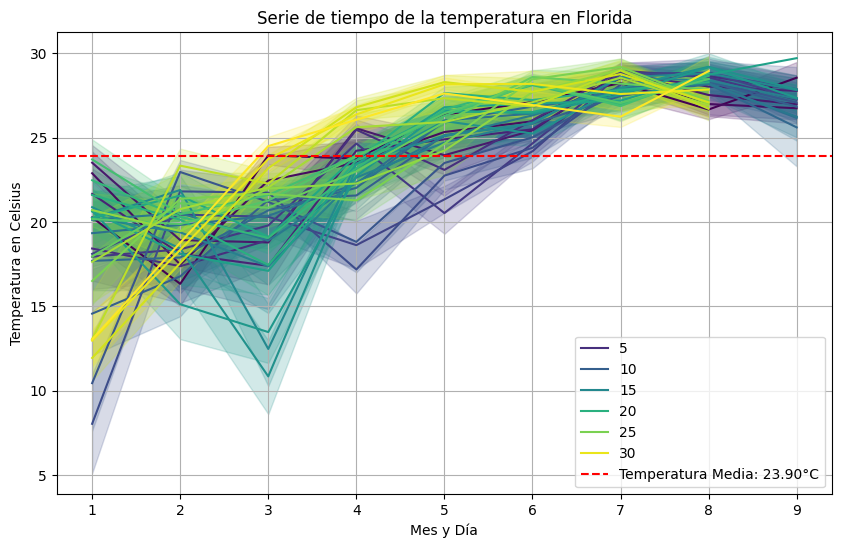

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un nuevo DataFrame con 'mes' y 'dia' como índice
df_fl_ap_new = df_fl_ap.copy()
df_fl_ap_new.set_index(['mes', 'dia'], inplace=True)

# Asegurarse de que los valores en 'TEMPERATURA_CELSIUS' sean numéricos
df_fl_ap_new['TEMPERATURA_CELSIUS'] = pd.to_numeric(df_fl_ap_new['TEMPERATURA_CELSIUS'], errors='coerce')

# Eliminar filas con valores NaN en 'TEMPERATURA_CELSIUS'
df_fl_ap_new.dropna(subset=['TEMPERATURA_CELSIUS'], inplace=True)

# Graficar la serie de tiempo de la temperatura
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_fl_ap_new.reset_index(), x='mes', y='TEMPERATURA_CELSIUS', hue='dia', palette='viridis', legend='auto')

# Agregar una línea adicional en la serie de tiempo
# Por ejemplo, una línea horizontal en la temperatura media
mean_temp = df_fl_ap_new['TEMPERATURA_CELSIUS'].mean()
plt.axhline(y=mean_temp, color='red', linestyle='--', label=f'Temperatura Media: {mean_temp:.2f}°C')

plt.title('Serie de tiempo de la temperatura en Florida')
plt.xlabel('Mes y Día')
plt.ylabel('Temperatura en Celsius')
plt.legend()
plt.grid()
plt.show()

Del **primer insight**, tuvimos que la temperatura media en general en EEUU es de aproximadamente: 14.01 grados centígrados.

Mientras que al filtrar solo el análisis en Florida, es de 23.9 grados centígrados, una diferencia notoria.

Comparten el mismo creciente debido a las estaciones, pero en su período de invierno incluso puede llegar a tener temperaturas muy cercanas al promedio o muy cerca. 

Podemos concluir, que incluso en épocas de alto frío (como invierno), es posible disfrutar de un tiempo espléndido. Obviamente la mejor época para ir es entre marzo y setiembre (Primavera y Verano).

## CONCLUSIONES

- Florida presenta un clima cálido, este es debido a su posición geográfica en gran parte de su territorio (costa), las precipitaciones no suelen ser intensas, es un gran destino si te gusta el calor, incluso en épocas de frío, las temperaturas rondan entre los 15 y 20 grados centígrados.
- El tiempo perfecto para visitar Florida, es a partir del mes de abril hasta el fin del verano en setiembre, en promedio el clima siempre es cálido, ideal para aquellos que disfruten de su estancia en las playas.
- Se han descubierto métricas que puedan ayudar a como dirigir un route map para disfrutar del clima caluroso de Florida, el primero es priorizar aquellos lugares donde las precipitaciones sean muy ligeras, y el segundo es priorizando las zonas que tengan menor latitud, es decir, las que estén más al sur.

Finalmente, seleccionemos las características para nuestro modelo de predicción de la **temperatura en Florida**.

# SELECCIÓN DE CARACTERÍSTICAS

## CODIFICACIÓN DE VARIABLES CATEGÓRICAS

Para facilidad del análisis, ya que las **estaciones** han sido agrupadas, usaremos una técnica para pasar variables categóricas a numéricas, sin que afecte el dimensionalidad del dataset. Esta técnica se hace llamar label encoder

Cada variable diferente asignada será un número del 1 al n.

In [100]:
# valores unicos de las columnas: estacion y estado
print(df_fl_ap['estacion'].unique(), len(df_fl_ap['estacion'].unique()))
print(df_fl_ap['estado'].unique(), len(df_fl_ap['estado'].unique()))
print(df_fl_ap['rango_estacion'].unique(), len(df_fl_ap['rango_estacion'].unique()))

['ORLANDO INTL AP' 'GAINESVILLE RGNL AP' 'DAYTONA BEACH INTL AP'
 'KEY WEST INTL AP' 'MIAMI INTL AP' 'TAMPA INTL AP' 'VERO BEACH INTL AP'
 'WEST PALM BEACH INTL AP' 'FT LAUDERDALE HOLLYWOOD AP' 'JACKSONVILLE'
 'JACKSONVILLE CRAIG MUNI AP' 'TALLAHASSEE'] 12
['FL'] 1
['Rango 3', 'Rango 4', 'Rango 2']
Categories (5, object): ['Rango 1' < 'Rango 2' < 'Rango 3' < 'Rango 4' < 'Rango 5'] 3


Son 12 estaciones, 3 rangos de estaciones y 1 estado (ya que el caso de estudio es en Florida), lo que hace que técnicas como **ONE-HOT ENCODING** sean efectivas, ya que aumentan la dimensionalidad del dataset no aumenta tanto.

Pero existe una mejor opción, procederemos a ocupar **label encoder** para las estaciones y el rango_estacion, por otro lado, se eliminará la columna estado, ya que tiene un único valor.

In [101]:
# label encoding
from sklearn.preprocessing import LabelEncoder

# Paso 1: Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Paso 2: Convertir las categorías en números
df_fl_ap['estacion'] = label_encoder.fit_transform(df_fl_ap['estacion']) + 1


# Paso 3: Converitr las categorías en números
df_fl_ap['rango_estacion'] = label_encoder.fit_transform(df_fl_ap['rango_estacion']) + 1

# Eliminar la columna 'estado'
df_fl_ap.drop(columns='estado', inplace=True)

df_fl_ap

C:\Users\Godel\AppData\Local\Temp\ipykernel_25400\2446280920.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fl_ap['estacion'] = label_encoder.fit_transform(df_fl_ap['estacion']) + 1
C:\Users\Godel\AppData\Local\Temp\ipykernel_25400\2446280920.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fl_ap['rango_estacion'] = label_encoder.fit_transform(df_fl_ap['rango_estacion']) + 1
C:\Users\Godel\AppData\Local\Temp\ipykernel_25400\2446280920.py:15: SettingWithCopyWarning: 
A value is trying to be se

,estacion,latitud,longitud,msnm,TEMPERATURA_CELSIUS,VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA,DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS,VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA,PRECIPITACION_mm,mes,dia,rango_estacion
0,8,28.4339,-81.3250,27.4,6.9,15.88,360.00,29.08,0.00,1,8,2
1,8,28.4339,-81.3250,27.4,16.5,10.07,360.00,25.05,0.00,2,10,2
2,8,28.4339,-81.3250,27.4,19.6,9.62,360.00,38.92,0.20,2,23,2
3,3,29.6919,-82.2756,37.5,28.2,4.70,360.00,23.94,0.17,7,4,3
4,1,29.1828,-81.0483,9.4,26.4,3.80,360.00,36.01,2.51,6,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3102,5,30.3361,-81.5147,12.5,27.1,3.80,200.79,25.31,0.02,8,6,2
3103,5,30.3361,-81.5147,12.5,25.0,7.83,200.79,25.31,0.04,8,28,2
3104,9,30.3975,-84.3289,19.2,18.4,6.04,200.79,25.31,0.00,1,16,2
3105,9,30.3975,-84.3289,19.2,23.9,4.92,200.79,25.31,3.92,6,6,2


La variable más importante al analizar el clima es la temperatura, es por ello que nuestro **target será la TEMPERATURA EN CELSIUS EN EL AÑO 2017 EN ESTADOS UNIDOS**

Guardemos el df en un nuevo csv como weather_numeric.csv

In [102]:
#Guardemos el df en un nuevo csv como weather_numeric.csv
df_fl_ap.to_csv('weather_numeric_florida.csv', index=False)

Ahora que las variables categórticas han sido codificados, seleccionemos las características principales para predecir **target**

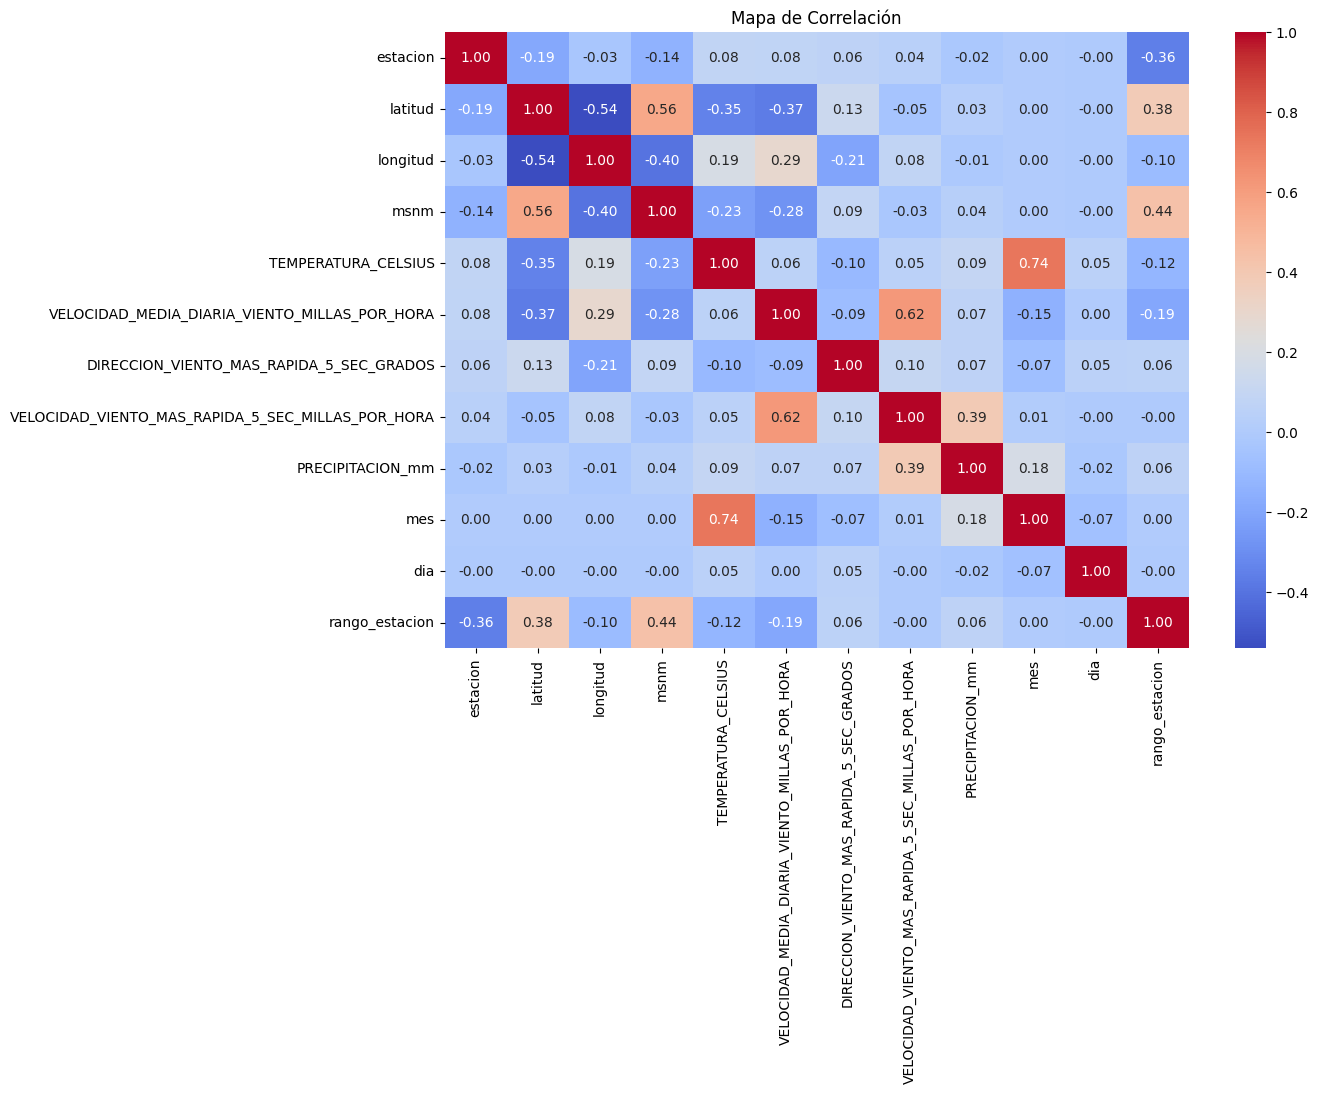

In [103]:
## mapa de correlación de las variables

plt.figure(figsize=(12, 8))
sns.heatmap(df_fl_ap.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación')
plt.show()

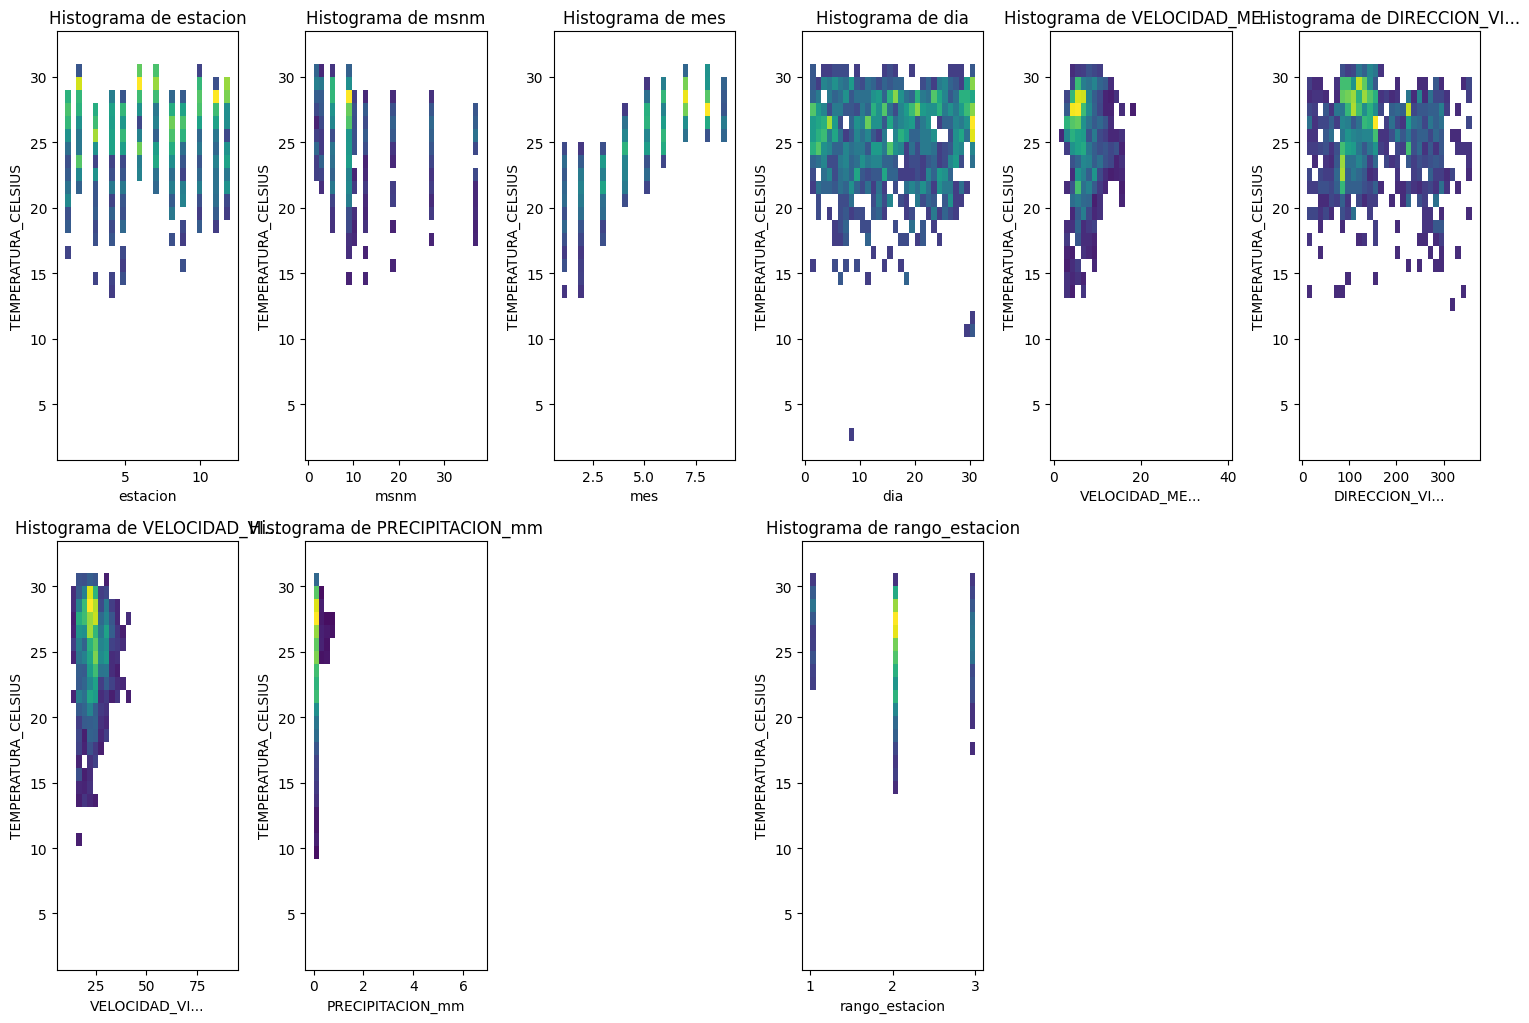

In [105]:
## histograma del target (TEMPERATURA_CELSIUS) con las demás variables
## con subplots

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar columnas numéricas
numeric_columns = ['estacion', 'msnm', 'mes', 'dia', 'VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA', 
                   'DIRECCION_VIENTO_MAS_RAPIDA_5_SEC_GRADOS' , 'VELOCIDAD_VIENTO_MAS_RAPIDA_5_SEC_MILLAS_POR_HORA',
                   'PRECIPITACION_mm', 'TEMPERATURA_CELSIUS', 'rango_estacion']

# Función para acortar nombres de columnas
def shorten_column_name(name):
    if len(name) > 20:
        return name[:12] + '...'
    return name

# Crear histogramas para cada variable numérica (other variables vs. TEMPERATURA_CELSIUS)
plt.figure(figsize=(15, 15))
for i, column in enumerate(numeric_columns):
    if column == 'TEMPERATURA_CELSIUS':
        continue
    plt.subplot(3, 6, i + 1)
    sns.histplot(df_fl_ap, x=column, y='TEMPERATURA_CELSIUS', bins=30, pthresh=.1, cmap='viridis')
    plt.title(f'Histograma de {shorten_column_name(column)}')
    plt.xlabel(shorten_column_name(column))
    plt.ylabel('TEMPERATURA_CELSIUS')
    plt.tight_layout()
plt.show()

Viendo las gráficas, debemos buscar **tendencias crecientes o variables que hayan aportado en los insights de nuestro estudio**, por lo que las características seleccionadas en base a lo establecido serán:

- mes
- rango_estacion

**Obtuvimos insights basado en estas 2 variables**. Por lo que usarlas como variables predictivas son una gran opción, ya que presentan una ligera tendencia creciente.

Las demás variables, tienen una concentración muy agrupada, pero tanto la velocidad media diaria del viento como la velocidad máxima del viento en 5 segundos, se correlacionan con la temperatura en un comienzo. Así que **seleccionaremos solo una de estas para evitar que una de ellas le genere sesgo a la otra.**

por lo que al final tendremos 3 características

- mes
- rango_estacion
- la velocidad media diaria del viento

## Escalamiento

Como no sabemos la distribución de los datos, **vamos a estandarizar las características que hemos seleccionado**.

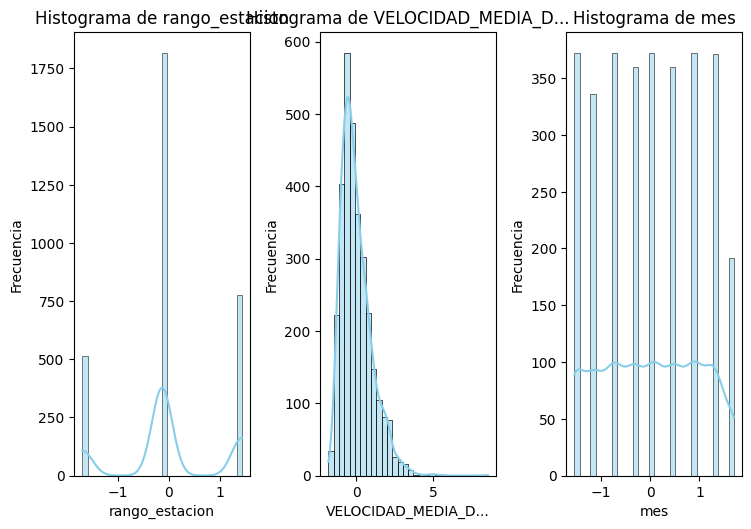

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Seleccionar las características y el target
features = ['rango_estacion', 'VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA', 'mes']
target = 'TEMPERATURA_CELSIUS'

# Escalar las características
scaler = StandardScaler()
df_scaled = df_fl_ap.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

# Crear un DataFrame con las características escaladas y el target
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Función para acortar nombres de columnas
def shorten_column_name(name):
    if len(name) > 20:
        return name[:17] + '...'
    return name

# Histogramas de las características escaladas
plt.figure(figsize=(15, 15))
for i, column in enumerate(features):
    plt.subplot(3, 6, i + 1)
    sns.histplot(df_scaled[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Histograma de {shorten_column_name(column)}')
    plt.xlabel(shorten_column_name(column))
    plt.ylabel('Frecuencia')
    plt.tight_layout()

plt.show()

# Guardar el DataFrame escalado en un archivo CSV
df_scaled.to_csv('weather_scaled.csv', index=False)

## TESTEO CON REGRESIÓN LINEAL

In [107]:
# Selección de características, división de datos y entrenamiento del modelo
# 4 características: 'rango_estacion', 'estado', 'VELOCIDAD_MEDIA_DIARIA_VIENTO_MILLAS_POR_HORA ', 'mes'

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Convertir las características categóricas a variables dummy
X = df_scaled[features]

# Convertir el target a un DataFrame
y = df_scaled[target]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

print(f'Error cuadrático medio: {mse:.2f}')

Error cuadrático medio: 8.47


## Determinar el coeficiento de determinación

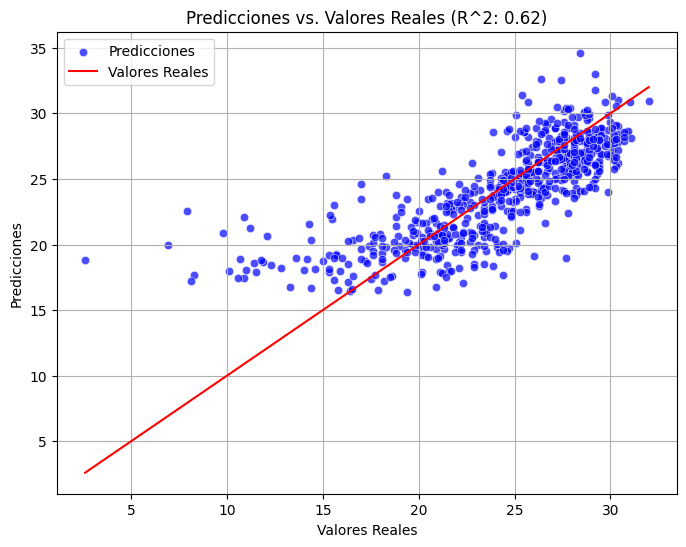

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Graficar y_test vs y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7, label='Predicciones')
sns.lineplot(x=y_test, y=y_test, color='red', label='Valores Reales')  # Línea de referencia
plt.title(f'Predicciones vs. Valores Reales (R^2: {r2:.2f})')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid()
plt.show()

La línea se ajusta a gran cantidad de los puntos, con un r-score de 0.62, el cual no es el esperado, pero es un buen indicio para poder predecir la temperatura en Florida. Esto será de gran ayuda para **Yhair y Luis**, ahora ellos están decididos en emprender su viaje hacia Florida, podrán planificar su lista de lugares a visitar en base a sus gustos personales.